In [4]:
# 🐶🐱 Cat vs Dog Classifier using Transfer Learning (MobileNetV2)

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
import matplotlib.pyplot as plt

In [5]:
# Dataset path
base_dir = "dataset"
train_dir = os.path.join(base_dir, 'train')

print(train_dir)

dataset\train


In [6]:
# Set Parameters
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

# Preprocess Data (with MobileNetV2's preprocessing)

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 447 images belonging to 2 classes.


Found 110 images belonging to 2 classes.


In [7]:
# Build Transfer Learning Model using MobileNetV2
base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model layers

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\DELL\AppData\Local\Temp\ipykernel_11316\63910574.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
# Train the Model
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)

# Evaluate the Model
val_loss, val_acc = model.evaluate(val_gen)
print(f"📊 Final Validation Accuracy: {val_acc:.2f}")


f:\Kaggle\Cat vs Dog Binary Image Classification\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 829ms/step - accuracy: 0.7120 - loss: 0.7266 - val_accuracy: 0.8727 - val_loss: 0.2355
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 655ms/step - accuracy: 0.9159 - loss: 0.1962 - val_accuracy: 0.8545 - val_loss: 0.3112
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 642ms/step - accuracy: 0.9368 - loss: 0.1438 - val_accuracy: 0.8818 - val_loss: 0.2679
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 629ms/step - accuracy: 0.9315 - loss: 0.1821 - val_accuracy: 0.8545 - val_loss: 0.3142
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 613ms/step - accuracy: 0.9247 - loss: 0.1622 - val_accuracy: 0.9182 - val_loss: 0.1859
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 622ms/step - accuracy: 0.9264 - loss: 0.1625 - val_accuracy: 0.8909 - val_loss: 0.2402
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 680ms/step - accuracy: 0.9348 - loss: 0.1451 - val_accuracy: 0.8909 - val_loss: 0.2357
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 691ms/step - accuracy: 0.9509 - loss: 0.0863 - val_accuracy: 

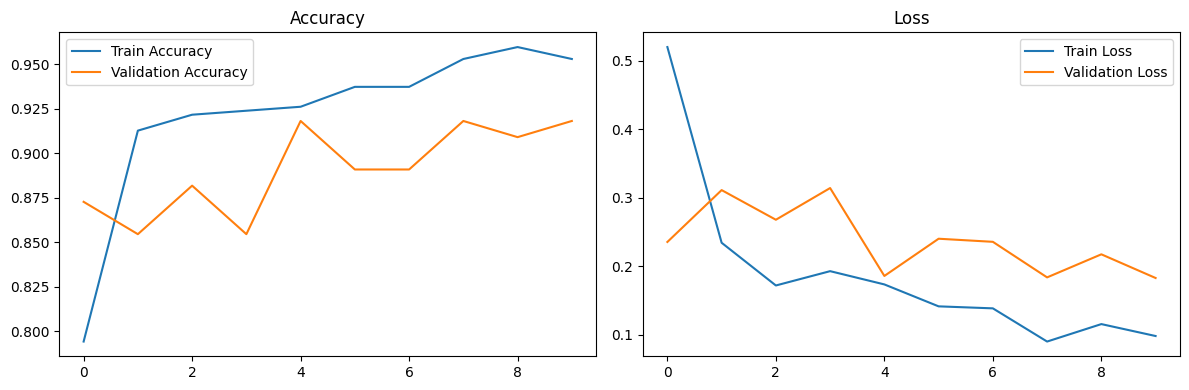

In [9]:
# Plot Accuracy and Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()

In [ ]:
# Save the Model
model.save('cat_dog_transfer_model.keras')

# to load the model:
# from tensorflow.keras.models import load_model
# model = load_model("cat_dog_classifier.keras")


In [11]:
from tensorflow.keras.preprocessing import image

# function to Predict a single image
def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    label = "Dog 🐶" if prediction > 0.5 else "Cat 🐱"
    confidence = prediction if prediction > 0.5 else 1 - prediction
    print(f"Prediction: {label} ({confidence*100:.2f}% confidence)")

In [15]:
# trying to predict a dog image

predict_image("dataset/test/dogs/dog_75.jpg")
predict_image("dataset/test/dogs/dog_43.jpg")
predict_image("dataset/test/dogs/dog_159.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Prediction: Dog 🐶 (100.00% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Prediction: Dog 🐶 (99.95% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Prediction: Dog 🐶 (100.00% confidence)


In [14]:
# trying to predict a cat image

predict_image("dataset/test/cats/cat_1.jpg")
predict_image("dataset/test/cats/cat_18.jpg")
predict_image("dataset/test/cats/cat_156.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediction: Cat 🐱 (99.96% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Prediction: Cat 🐱 (84.08% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prediction: Cat 🐱 (51.44% confidence)
